In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats


In [31]:
train_file = pd.read_csv('iot-datasets/train.csv')
test_file = pd.read_csv('iot-datasets/test.csv')
severity_type = pd.read_csv('iot-datasets/severity_type.csv')
event_type = pd.read_csv('iot-datasets/event_type.csv')
log_feature = pd.read_csv('iot-datasets/log_feature.csv')
resource_type = pd.read_csv('iot-datasets/resource_type.csv')

In [32]:
dataset_ = {
    'train': train_file,
    'test': test_file,
    'severity_type':severity_type,
    'event_type':event_type,
    'log_feature':log_feature,
    'resource_type':resource_type
}

In [33]:
dataset_['train'].head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


Dataset shapes

In [34]:
print(f"shape of train dataset: {dataset_['train'].shape}")
print(f"Shape of test dataset: {dataset_['test'].shape}")
print(f"Shape of severity_type dataset: {dataset_['severity_type'].shape}")
print(f"Shape of event_type dataset: {dataset_['event_type'].shape}")
print(f"Shape of log_feature dataset: {dataset_['log_feature'].shape}")
print(f"Shape of resource_type dataset: {dataset_['resource_type'].shape}")


shape of train dataset: (7381, 3)
Shape of test dataset: (11171, 2)
Shape of severity_type dataset: (18552, 2)
Shape of event_type dataset: (31170, 2)
Shape of log_feature dataset: (58671, 3)
Shape of resource_type dataset: (21076, 2)


In [35]:
dataset_['severity_type'].head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [36]:
def check_unique_ids(dataset_name):
    dataset = dataset_[dataset_name]
    unique_ids = dataset['id'].nunique()
    repeated_ids = len(dataset['id']) - unique_ids
    print(dataset_name)
    print(f"Number of unique ids: {unique_ids}")
    print(f"Number of ids repeated more than once: {repeated_ids}")
    print("======================")
check_unique_ids('train')
check_unique_ids('test')
check_unique_ids('severity_type')
check_unique_ids('event_type')
check_unique_ids('resource_type')
check_unique_ids('log_feature')

train
Number of unique ids: 7381
Number of ids repeated more than once: 0
test
Number of unique ids: 11171
Number of ids repeated more than once: 0
severity_type
Number of unique ids: 18552
Number of ids repeated more than once: 0
event_type
Number of unique ids: 18552
Number of ids repeated more than once: 12618
resource_type
Number of unique ids: 18552
Number of ids repeated more than once: 2524
log_feature
Number of unique ids: 18552
Number of ids repeated more than once: 40119


In [37]:
def check_cardinality(name1, name2):
    count1 = dataset_[name1]['id'].value_counts()
    count2 = dataset_[name2]['id'].value_counts()
    one_to_one = len(count1[count1 == 1].index.intersection(count2[count2 == 1].index))
    one_to_many = len(count1[count1 == 1].index.intersection(count2[count2 > 1].index))
    many_to_many = len(count1[count1 > 1].index.intersection(count2[count2 > 1].index))
    print(f"{name1} VS {name2}")
    print(f"one to one: {one_to_one}, one to many: {one_to_many}, many to many {many_to_many}")
    print("*")


check_cardinality('train','severity_type')
check_cardinality('train', 'event_type')
check_cardinality('train','resource_type')
check_cardinality('train','log_feature')
print("======================")

check_cardinality('test','severity_type')
check_cardinality('test','event_type')
check_cardinality('test','resource_type')
check_cardinality('test','log_feature')

train VS severity_type
one to one: 7381, one to many: 0, many to many 0
*
train VS event_type
one to one: 3176, one to many: 4205, many to many 0
*
train VS resource_type
one to one: 6503, one to many: 878, many to many 0
*
train VS log_feature
one to one: 985, one to many: 6396, many to many 0
*
test VS severity_type
one to one: 11171, one to many: 0, many to many 0
*
test VS event_type
one to one: 4839, one to many: 6332, many to many 0
*
test VS resource_type
one to one: 9918, one to many: 1253, many to many 0
*
test VS log_feature
one to one: 1505, one to many: 9666, many to many 0
*


## Visualize counts of features

/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


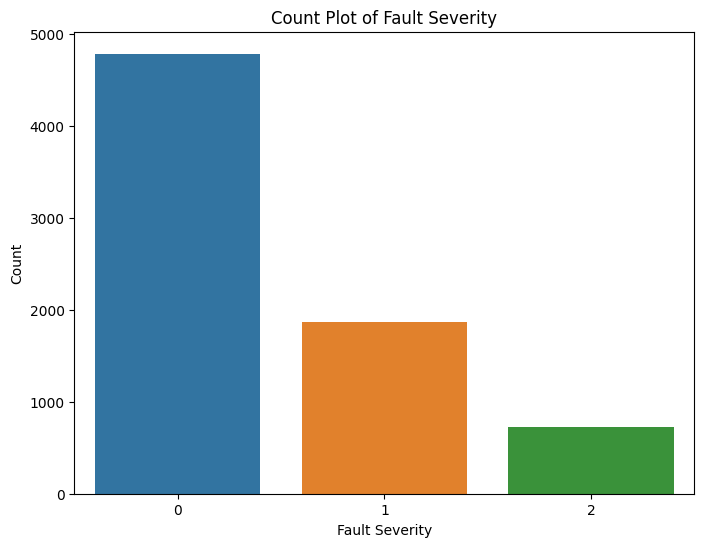

In [38]:
plt.figure(figsize=(8, 6)) 
sns.countplot(data=dataset_['train'], x='fault_severity')
plt.xlabel('Fault Severity')
plt.ylabel('Count')
plt.title('Count Plot of Fault Severity')
plt.show()

/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


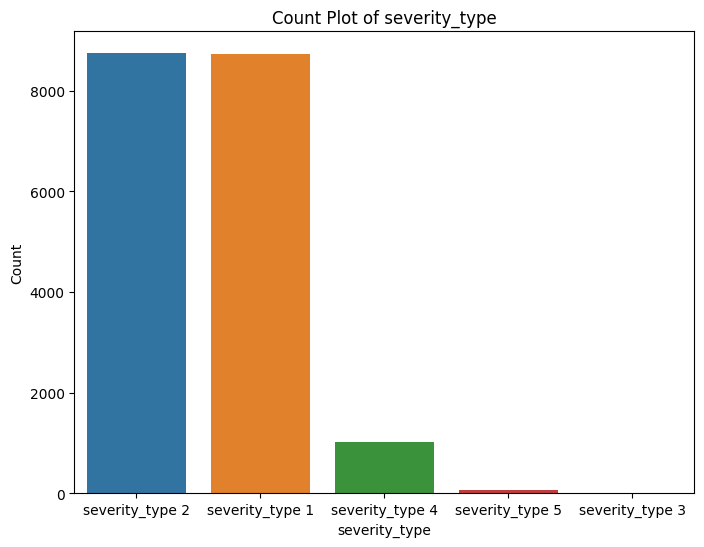

In [39]:
plt.figure(figsize=(8, 6)) 
sns.countplot(data=dataset_['severity_type'], x='severity_type')
plt.xlabel('severity_type')
plt.ylabel('Count')
plt.title('Count Plot of severity_type')
plt.show()

/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


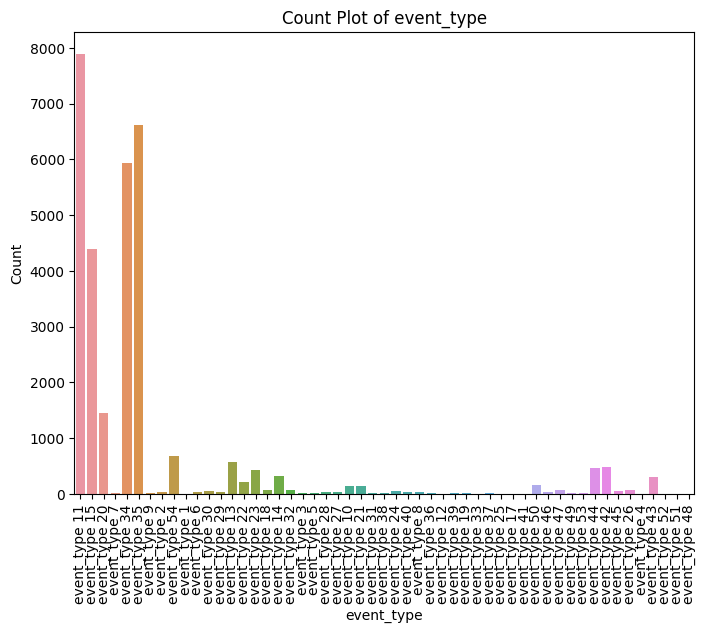

In [40]:
plt.figure(figsize=(8, 6)) 
sns.countplot(data=dataset_['event_type'], x='event_type')
plt.xticks(rotation=90) 
plt.xlabel('event_type')
plt.ylabel('Count')
plt.title('Count Plot of event_type')
plt.show()

/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


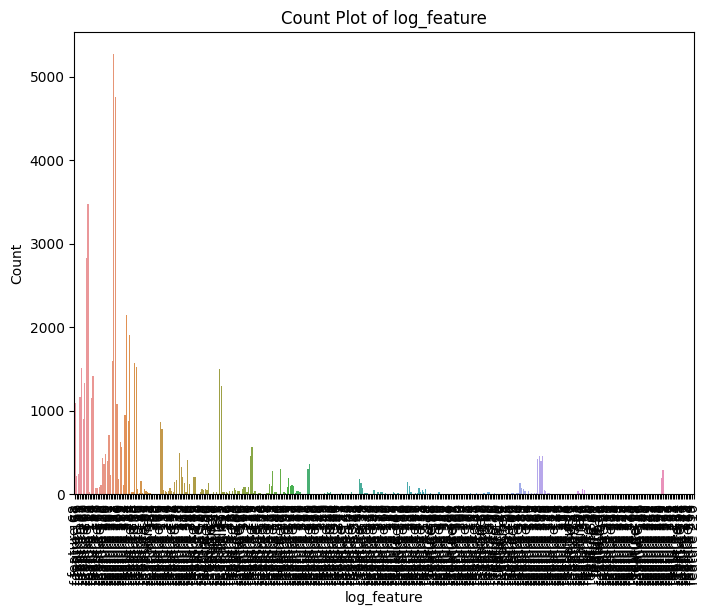

In [41]:
plt.figure(figsize=(8, 6)) 
sns.countplot(data=dataset_['log_feature'], x='log_feature')
plt.xticks(rotation=90) 
plt.xlabel('log_feature')
plt.ylabel('Count')
plt.title('Count Plot of log_feature')
plt.show()

In [42]:
log_feature_counts = dataset_['log_feature']['log_feature'].value_counts()
max_count_value = log_feature_counts.idxmax()
print(max_count_value)

feature 312


/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


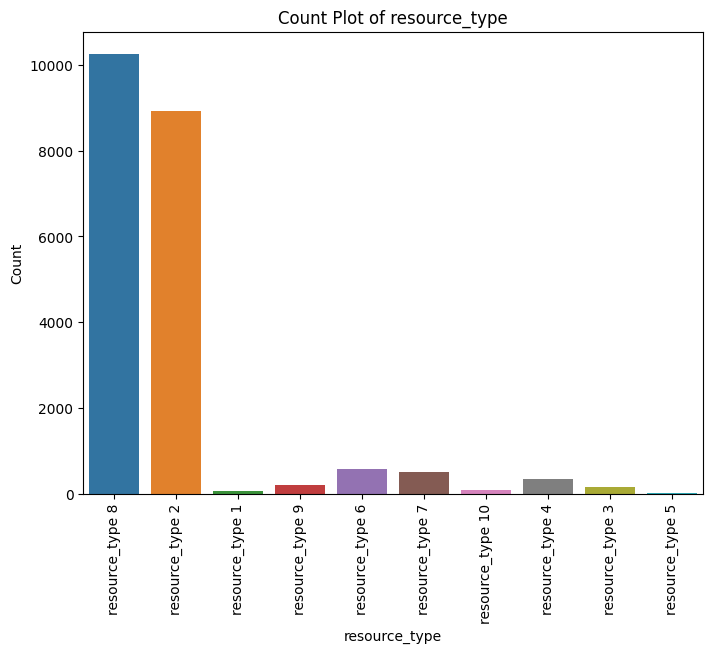

In [43]:
plt.figure(figsize=(8, 6)) 
sns.countplot(data=dataset_['resource_type'], x='resource_type')
plt.xticks(rotation=90) 
plt.xlabel('resource_type')
plt.ylabel('Count')
plt.title('Count Plot of resource_type')
plt.show()

In [44]:
df = pd.merge(dataset_['train'], dataset_['severity_type'])
df = pd.merge(df, dataset_['resource_type'])
df = pd.merge(df, dataset_['log_feature'])
df = pd.merge(df, dataset_['event_type'])
severity_mapping = {0: 'No Fault', 1: 'Some Faults', 2: 'Many Faults'}
df['fault_severity'] = df['fault_severity'].map(severity_mapping)


In [45]:
df.head()

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,Some Faults,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,Some Faults,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,Some Faults,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,Some Faults,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,No Fault,severity_type 2,resource_type 2,feature 315,200,event_type 34


In [46]:
df.shape

(61839, 8)

In [47]:
df.set_index('id', inplace=True)
df

,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
id,,,,,,,
14121,location 118,Some Faults,severity_type 2,resource_type 2,feature 312,19,event_type 34
14121,location 118,Some Faults,severity_type 2,resource_type 2,feature 312,19,event_type 35
14121,location 118,Some Faults,severity_type 2,resource_type 2,feature 232,19,event_type 34
14121,location 118,Some Faults,severity_type 2,resource_type 2,feature 232,19,event_type 35
9320,location 91,No Fault,severity_type 2,resource_type 2,feature 315,200,event_type 34
...,...,...,...,...,...,...,...
15189,location 7,No Fault,severity_type 1,resource_type 8,feature 55,10,event_type 11
15189,location 7,No Fault,severity_type 1,resource_type 8,feature 70,1,event_type 11
17067,location 885,No Fault,severity_type 1,resource_type 8,feature 81,1,event_type 11


In [48]:
df.describe()

,volume
count,61839.000000
mean,8.390336
std,22.902491
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,877.000000


In [49]:
df.dtypes

location          object
fault_severity    object
severity_type     object
resource_type     object
log_feature       object
volume             int64
event_type        object
dtype: object

In [50]:
len(df[df['severity_type'] == 'severity_type 2' ]['fault_severity'] == 0)

24260

/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/ve

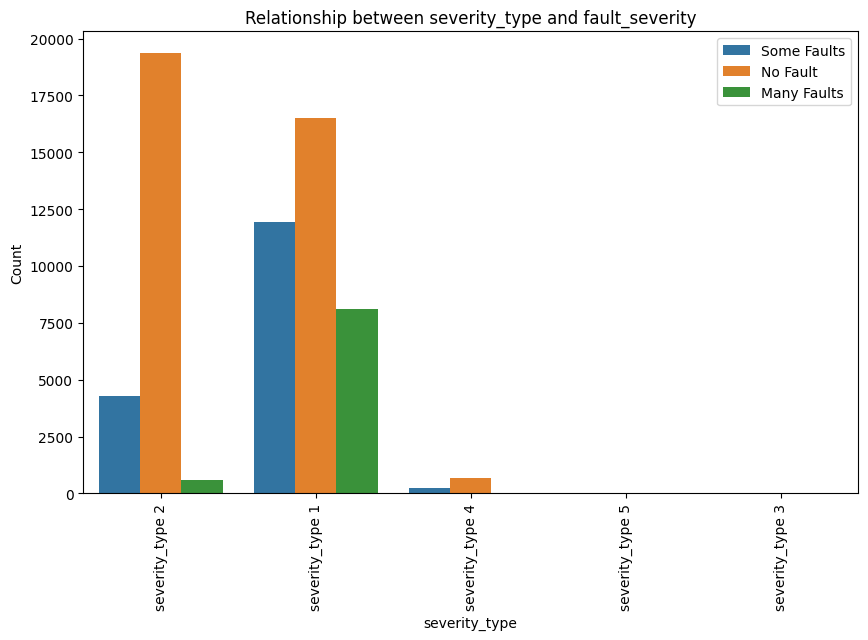

/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/ve

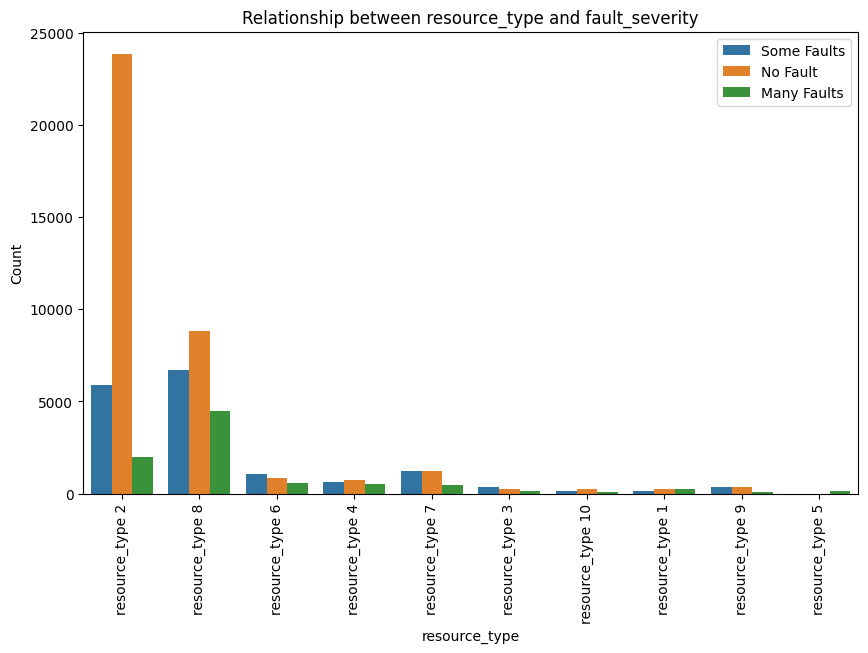

/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/ve

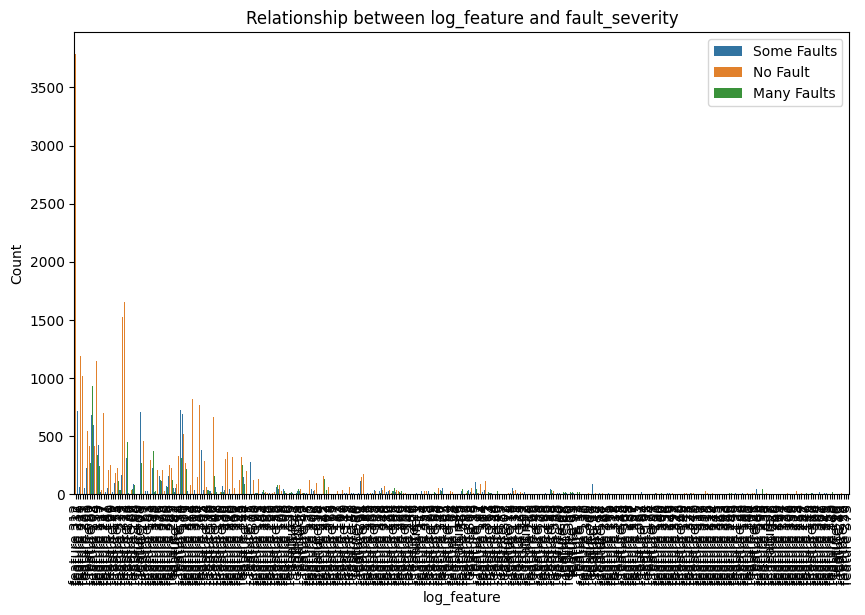

/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ghomefolder/Desktop/verizon/verizon-iot-outage-prediction/ve

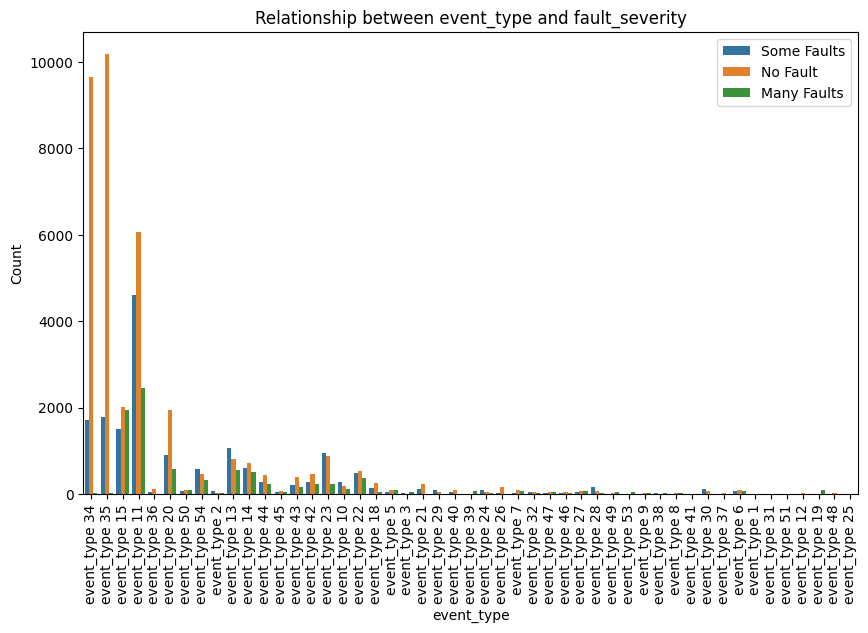

In [60]:
def count_plots_relationship(feature1, feature2):

    # sorted_df = df.groupby(feature1)[feature2].count().reset_index().sort_values(by=feature2, ascending=False)

    # top_5_categories = sorted_df[feature1].head(5).tolist()

    # df = df[df[feature1].isin(top_5_categories)]

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature1, hue=feature2)
    plt.title(f'Relationship between {feature1} and {feature2}')
    plt.xlabel(feature1)
    plt.xticks(rotation=90) 
    plt.ylabel('Count')
    plt.legend()
    plt.show()

count_plots_relationship('severity_type', 'fault_severity')
count_plots_relationship('resource_type', 'fault_severity')
count_plots_relationship('log_feature', 'fault_severity')
count_plots_relationship('event_type', 'fault_severity')